# Rotating Vanillin Molecule GIF Generator

In [63]:
# Cell 1: Install dependencies
!pip install -q rdkit-pypi pillow numpy matplotlib

# Vanillin Molecule with pure black backround

In [78]:
# Cell 2: Generate vanillin

from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# SMILES for 4-hydroxy-3-methoxybenzaldehyde (vanillin):
#  – aldehyde at C1, OH at C4 (para), OCH3 at C3 (meta)
smiles = "O=Cc1ccc(O)c(OC)c1"

mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

conf  = mol.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i))
                   for i in range(mol.GetNumAtoms())])

In [79]:
# Cell 3: Compute ring plane & circle
rings = list(Chem.GetSymmSSSR(mol))
ring = next((r for r in rings if len(r)==6), rings[0])
idxs = list(ring)
ring_coords = coords[idxs]

center = ring_coords.mean(axis=0)
coords0 = ring_coords - center
_,_,vh = np.linalg.svd(coords0, full_matrices=False)
u1, u2 = vh[0], vh[1]
radius = np.mean(np.linalg.norm(coords0, axis=1))

theta = np.linspace(0,2*np.pi,200)
# inner dashed circle to display the resonance in the Benzene Ring
radius_inner = radius * 0.8
inner_circle = np.array([
    center + radius_inner*(np.cos(t)*u1 + np.sin(t)*u2)
    for t in theta
])
N = len(inner_circle)
dash_len = int(N * 0.12)
gap_len  = int(N * 0.06)


Run this Cell 4 if you want a pure black backround

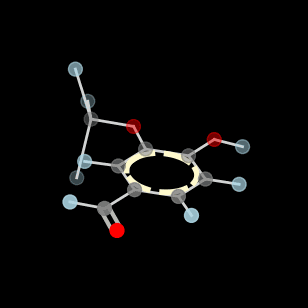

In [80]:
# Cell 4: Render frames, assemble GIF, then display GIF

from rdkit.Chem import BondType

frames = []
offset_scale = 0.15    # spacing for the double‐bond lines
single_bond_color = 'lightgray'
double_bond_color = '#BBBBBB'  # subtle light grey to distinguish single and double bond colors
dash_color = '#FFFACD'         # pale resonance (light yellow to make it visible)

for angle in range(0, 360, 10):
    fig = plt.figure(figsize=(4,4), facecolor='black')
    ax  = fig.add_subplot(projection='3d', facecolor='black')

    # atoms by element
    element_colors = {'C':'gray','O':'red','H':'#ADD8E6'}
    atom_colors = [element_colors.get(a.GetSymbol(),'yellow')
                   for a in mol.GetAtoms()]
    ax.scatter(coords[:,0], coords[:,1], coords[:,2],
               s=100, c=atom_colors, depthshade=True)

    # bonds
    for bond in mol.GetBonds():
        i,j = bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()
        p1,p2 = coords[i], coords[j]
        xs, ys, zs = [p1[0],p2[0]], [p1[1],p2[1]], [p1[2],p2[2]]

        if bond.GetBondType() == BondType.DOUBLE:
            # compute perpendicular offset
            v = p2 - p1
            perp = np.cross(v, [0,0,1])
            if np.linalg.norm(perp) < 1e-3:
                perp = np.cross(v, [0,1,0])
            perp = perp / np.linalg.norm(perp) * offset_scale

            # first of the parallel lines
            xs1 = [p1[0]+perp[0], p2[0]+perp[0]]
            ys1 = [p1[1]+perp[1], p2[1]+perp[1]]
            zs1 = [p1[2]+perp[2], p2[2]+perp[2]]
            ax.plot(xs1, ys1, zs1,
                    color=double_bond_color,
                    linewidth=3,
                    solid_capstyle='round')

            # second parallel line
            xs2 = [p1[0]-perp[0], p2[0]-perp[0]]
            ys2 = [p1[1]-perp[1], p2[1]-perp[1]]
            zs2 = [p1[2]-perp[2], p2[2]-perp[2]]
            ax.plot(xs2, ys2, zs2,
                    color=double_bond_color,
                    linewidth=3,
                    solid_capstyle='round')
        else:
            ax.plot(xs, ys, zs,
                    color=single_bond_color,
                    linewidth=2)

    # dashed inner resonance ring at 4.5× speed
    phase = int((angle * 4.5 / 360) * N)
    for start in range(0, N, dash_len + gap_len):
        idxs = [(start + phase + k) % N for k in range(dash_len)]
        seg = inner_circle[idxs]
        ax.plot(seg[:,0], seg[:,1], seg[:,2],
                color=dash_color,
                linewidth=4)

    # camera & cleanup
    ax.view_init(elev=30, azim=angle)
    ax.set_axis_off()
    ax.dist = 7

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100,
                facecolor='black', bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    frames.append(PILImage.open(buf))

# save GIF
frames[0].save('vanillin_rotating.gif',
               format='GIF',
               save_all=True,
               append_images=frames[1:],
               duration=100,
               loop=0)

# Display result
from IPython.display import Image as DisplayImage
DisplayImage('vanillin_rotating.gif')

# Vanillin Molecule with Computational Chemistry Backround

This Cell has modified code to generate the rotating Vanillin molecule, but with a "Computational Chemistry" Themed backround. (matrix like theme with building blocks of life element symbols the 'C','O','H','N','P','S' instead of ones and zeros).

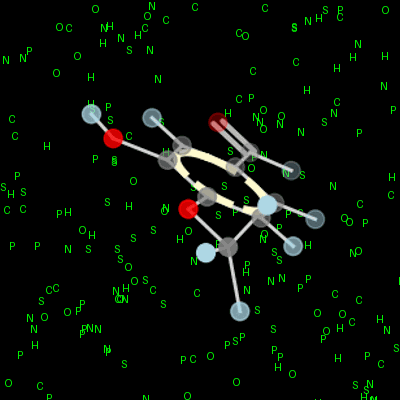

In [74]:
# Generate vanillin

from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# SMILES for 4-hydroxy-3-methoxybenzaldehyde (vanillin):
#  – aldehyde at C1, OH at C4 (para), OCH3 at C3 (meta)
smiles = "O=Cc1ccc(O)c(OC)c1"

mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

conf  = mol.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i))
                   for i in range(mol.GetNumAtoms())])

# Imports & molecule setup
from rdkit import Chem
from rdkit.Chem import AllChem, BondType
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PILImage, ImageDraw, ImageFont
import io

# build & optimize vanillin
smiles = "COC1=CC=C(C=C1O)C=O"
mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

# extract 3D coordinates
conf = mol.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i))
                   for i in range(mol.GetNumAtoms())])

# Compute aromatic‐ring plane & resonance circle
# find a 6-member aromatic ring
rings = list(Chem.GetSymmSSSR(mol))
ring = next((r for r in rings if len(r)==6), rings[0])
ring_idxs   = list(ring)
ring_coords = coords[ring_idxs]

# PCA via SVD to get two in-plane vectors
center = ring_coords.mean(axis=0)
coords0 = ring_coords - center
_,_,vh = np.linalg.svd(coords0, full_matrices=False)
u1, u2   = vh[0], vh[1]
radius   = np.mean(np.linalg.norm(coords0, axis=1))

# build dashed‐circle points
theta    = np.linspace(0, 2*np.pi, 200)
inner_circle = np.array([
    center + radius*0.8*(np.cos(t)*u1 + np.sin(t)*u2)
    for t in theta
])
N        = len(inner_circle)
dash_len = int(N*0.12)
gap_len  = int(N*0.06)

# Generate chemistry-themed Matrix rain (40 frames)

import numpy as np
from PIL import Image as PILImage, ImageDraw, ImageFont

width, height = 400, 400
num_drops     = 200
frames_bg     = 40  # must match total molecule frames
speed_per_frame = height // frames_bg  # 400/40 = 10px per frame

# initialize drop positions and speeds
x_positions = np.random.randint(0, width, size=num_drops)
y_positions = np.random.randint(0, height, size=num_drops)
speeds       = np.full(num_drops, speed_per_frame)

# use element symbols for the “code”
chem_chars  = ['C','O','H','N','P','S']
drop_chars  = [np.random.choice(chem_chars) for _ in range(num_drops)]

# load a monospace font
try:
    font = ImageFont.truetype("DejaVuSansMono.ttf", 14)
except:
    font = ImageFont.load_default()

bg_frames = []
for f in range(frames_bg):
    img  = PILImage.new('RGBA', (width, height), 'black')
    draw = ImageDraw.Draw(img)
    for i in range(num_drops):
        x = x_positions[i]
        y = y_positions[i]
        draw.text((x, y), drop_chars[i], font=font, fill=(0,255,0,255))
        # advance & wrap
        y_positions[i] = (y + speeds[i]) % height
        # optionally change character when it wraps
        if y_positions[i] < speeds[i]:
            drop_chars[i] = np.random.choice(chem_chars)
    bg_frames.append(img)

# Render vanillin-only frames with transparent background

from rdkit.Chem import BondType
import matplotlib.pyplot as plt
import numpy as np
import io

mol_frames = []
total_frames = len(bg_frames)
angle_step   = 360 / total_frames
offset_scale = 0.15

for idx, angle in enumerate(np.arange(0, 360, angle_step)):
    # create a transparent canvas
    fig = plt.figure(figsize=(4,4), facecolor='none')
    ax  = fig.add_subplot(projection='3d', facecolor='none')

    # 1) atoms
    element_map = {'C':'gray','O':'red','H':'#ADD8E6'}
    atom_cols   = [element_map.get(a.GetSymbol(),'yellow') for a in mol.GetAtoms()]
    ax.scatter(coords[:,0], coords[:,1], coords[:,2],
               s=100, c=atom_cols, depthshade=True)

    # 2) bonds (single & double)
    for b in mol.GetBonds():
        i, j = b.GetBeginAtomIdx(), b.GetEndAtomIdx()
        p1, p2 = coords[i], coords[j]
        xs, ys, zs = [p1[0],p2[0]], [p1[1],p2[1]], [p1[2],p2[2]]
        if b.GetBondType()==BondType.DOUBLE:
            v = p2-p1
            perp = np.cross(v,[0,0,1])
            if np.linalg.norm(perp)<1e-3: perp = np.cross(v,[0,1,0])
            perp = perp/np.linalg.norm(perp)*offset_scale
            for sign in (1,-1):
                xs_off = [p1[0]+sign*perp[0], p2[0]+sign*perp[0]]
                ys_off = [p1[1]+sign*perp[1], p2[1]+sign*perp[1]]
                zs_off = [p1[2]+sign*perp[2], p2[2]+sign*perp[2]]
                ax.plot(xs_off, ys_off, zs_off, color='#BBBBBB', linewidth=3, solid_capstyle='round')
        else:
            ax.plot(xs, ys, zs, color='lightgray', linewidth=2)

    # 3) dashed resonance circle
    phase = int((angle*4/360)*N)
    for start in range(0, N, dash_len+gap_len):
        idxs = [(start+phase+k)%N for k in range(dash_len)]
        seg  = inner_circle[idxs]
        ax.plot(seg[:,0], seg[:,1], seg[:,2], color='#FFFACD', linewidth=4)

    # camera & cleanup
    ax.view_init(elev=30, azim=angle)
    ax.set_axis_off()
    ax.dist = 7

    # capture as RGBA
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100,
                transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    mol_frames.append(PILImage.open(buf))

# Composite background + molecule frames and save GIF

frames = []
for bg_img, mol_img in zip(bg_frames, mol_frames):
    bg  = bg_img.convert('RGBA')
    mol = mol_img.convert('RGBA').resize(bg.size)
    comp = PILImage.alpha_composite(bg, mol)
    frames.append(comp)

frames[0].save(
    'vanillin_matrix_continuous_overlay.gif',
    format='GIF',
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0
)

from IPython.display import Image, display
display(Image('vanillin_matrix_continuous_overlay.gif'))

# Vanillin Molecule Code with matrix like backround of 1s and 0s

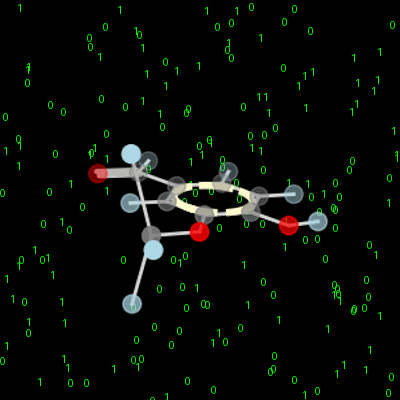

In [73]:
# Generate vanillin

from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

# SMILES for 4-hydroxy-3-methoxybenzaldehyde (vanillin):
#  – aldehyde at C1, OH at C4 (para), OCH3 at C3 (meta)
smiles = "O=Cc1ccc(O)c(OC)c1"

mol = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

conf  = mol.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i))
                   for i in range(mol.GetNumAtoms())])

# Generate Binary-Rain Background (0/1 only, 40 frames)
import numpy as np
from PIL import Image as PILImage, ImageDraw, ImageFont

width, height    = 400, 400
num_drops        = 200
frames_bg_binary = 40   # must equal number of molecule frames
speed_per_frame  = height // frames_bg_binary  # 10 px per frame

x_positions = np.random.randint(0, width, size=num_drops)
y_positions = np.random.randint(0, height, size=num_drops)
speeds       = np.full(num_drops, speed_per_frame)

bin_chars   = ['0','1']
drop_chars  = [np.random.choice(bin_chars) for _ in range(num_drops)]

try:
    font = ImageFont.truetype("DejaVuSansMono.ttf", 14)
except:
    font = ImageFont.load_default()

binary_bg_frames = []
for f in range(frames_bg_binary):
    img  = PILImage.new('RGBA', (width, height), 'black')
    draw = ImageDraw.Draw(img)
    for i in range(num_drops):
        x, y = x_positions[i], y_positions[i]
        draw.text((x, y), drop_chars[i], font=font, fill=(0,255,0,255))
        y_positions[i] = (y + speeds[i]) % height
        if y_positions[i] < speeds[i]:
            drop_chars[i] = np.random.choice(bin_chars)
    binary_bg_frames.append(img)

# Composite & save under a new filename
frames = []
for bg_img, mol_img in zip(binary_bg_frames, mol_frames):
    bg   = bg_img.convert('RGBA')
    mol  = mol_img.convert('RGBA').resize(bg.size)
    comp = PILImage.alpha_composite(bg, mol)
    frames.append(comp)

frames[0].save(
    'vanillin_binary_matrix_continuous_overlay.gif',
    format='GIF',
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0
)

from IPython.display import Image, display
display(Image('vanillin_binary_matrix_continuous_overlay.gif'))

# Vanillin Molecule, with Computational Chemistry backround combining the previous two backrounds of the elemental symbols and the 1s and 0s

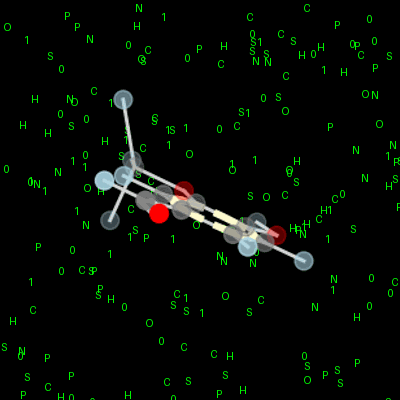

In [97]:
# ======================================================================================= #
# Rotating Vanillin over Mixed Element‐and‐Binary Rain GIF (Smooth, Zoomed‐Out, Seamless)
# ======================================================================================= #

# --- 1) Build & optimize the vanillin molecule --- #
from rdkit import Chem
from rdkit.Chem import AllChem, BondType
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image as PILImage, ImageDraw, ImageFont
import io

# SMILES for 4-hydroxy-3-methoxybenzaldehyde (vanillin):
smiles = "O=Cc1ccc(O)c(OC)c1"
mol    = Chem.AddHs(Chem.MolFromSmiles(smiles))
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
AllChem.MMFFOptimizeMolecule(mol)

# Extract 3D coordinates
conf   = mol.GetConformer()
coords = np.array([list(conf.GetAtomPosition(i))
                   for i in range(mol.GetNumAtoms())])

# --- 2) Compute benzene‐ring plane & build dashed resonance circle --- #
rings     = list(Chem.GetSymmSSSR(mol))
ring      = next((r for r in rings if len(r)==6), rings[0])
ring_idxs = list(ring)
ring_c    = coords[ring_idxs]

center  = ring_c.mean(axis=0)
coords0 = ring_c - center
_,_,vh  = np.linalg.svd(coords0, full_matrices=False)
u1, u2  = vh[0], vh[1]
radius  = np.mean(np.linalg.norm(coords0, axis=1))

theta        = np.linspace(0, 2*np.pi, 200)
inner_circle = np.array([
    center + radius*0.8*(np.cos(t)*u1 + np.sin(t)*u2)
    for t in theta
])
N        = len(inner_circle)
dash_len = int(N * 0.12)
gap_len  = int(N * 0.06)

# --- 3) Generate seamless mixed element/binary “Matrix” rain background (80 frames) --- #
width, height       = 400, 400
num_drops           = 200
frames_bg_mixed     = 80
base_speed          = height // frames_bg_mixed   # 5 px/frame

# Give each drop a speed = base_speed × (1,2 or 3) for variation & seamless looping
speeds = base_speed * np.random.randint(1, 4, size=num_drops)

# Random initial positions
x_positions = np.random.randint(0, width, size=num_drops)
y_positions = np.random.randint(0, height, size=num_drops)

# 30% binary, 70% element symbols; characters never change for perfect looping
chem_chars = ['C','O','H','N','P','S']
bin_chars  = ['0','1']
p_bin      = 0.3
drop_chars = [
    np.random.choice(bin_chars) if np.random.rand() < p_bin else
    np.random.choice(chem_chars)
    for _ in range(num_drops)
]

# Load monospace font
try:
    font = ImageFont.truetype("DejaVuSansMono.ttf", 14)
except:
    font = ImageFont.load_default()

mixed_bg_frames = []
for _ in range(frames_bg_mixed):
    img  = PILImage.new('RGBA', (width, height), 'black')
    draw = ImageDraw.Draw(img)
    for i in range(num_drops):
        x, y = x_positions[i], y_positions[i]
        draw.text((x, y), drop_chars[i], font=font, fill=(0,255,0,255))
        # advance & wrap; exact loop after 80 frames
        y_positions[i] = (y + speeds[i]) % height
    mixed_bg_frames.append(img)

# --- 4) Render transparent vanillin frames with manual zoom‐out & smooth rotation --- #
mol_frames   = []
angle_step   = 360 / frames_bg_mixed   # 4.5° per frame
offset_scale = 0.15

# Precompute padded bounding‐box to “zoom out”
x_min, x_max = coords[:,0].min(), coords[:,0].max()
y_min, y_max = coords[:,1].min(), coords[:,1].max()
z_min, z_max = coords[:,2].min(), coords[:,2].max()
pad          = 1.3
x_mid, y_mid, z_mid = (x_min+x_max)/2, (y_min+y_max)/2, (z_min+z_max)/2
xr = (x_max - x_min)/2 * pad
yr = (y_max - y_min)/2 * pad
zr = (z_max - z_min)/2 * pad

for idx, angle in enumerate(np.arange(0, 360, angle_step)):
    fig = plt.figure(figsize=(4,4), facecolor='none')
    ax  = fig.add_subplot(projection='3d', facecolor='none')

    # 4.1) Plot atoms
    element_map = {'C':'gray','O':'red','H':'#ADD8E6'}
    atom_cols   = [element_map.get(a.GetSymbol(),'yellow') for a in mol.GetAtoms()]
    ax.scatter(coords[:,0], coords[:,1], coords[:,2],
               s=100, c=atom_cols, depthshade=True)

    # 4.2) Plot bonds (single & double)
    for b in mol.GetBonds():
        i, j = b.GetBeginAtomIdx(), b.GetEndAtomIdx()
        p1, p2 = coords[i], coords[j]
        xs, ys, zs = [p1[0],p2[0]], [p1[1],p2[1]], [p1[2],p2[2]]
        if b.GetBondType() == BondType.DOUBLE:
            v    = p2 - p1
            perp = np.cross(v, [0,0,1])
            if np.linalg.norm(perp) < 1e-3:
                perp = np.cross(v, [0,1,0])
            perp = perp / np.linalg.norm(perp) * offset_scale
            for sign in (1, -1):
                xs_off = [p1[0]+sign*perp[0], p2[0]+sign*perp[0]]
                ys_off = [p1[1]+sign*perp[1], p2[1]+sign*perp[1]]
                zs_off = [p1[2]+sign*perp[2], p2[2]+sign*perp[2]]
                ax.plot(xs_off, ys_off, zs_off,
                        color='#BBBBBB', linewidth=3, solid_capstyle='round')
        else:
            ax.plot(xs, ys, zs, color='lightgray', linewidth=2)

    # 4.3) Fast dashed resonance circle
    phase = int((angle * 4.5 / 360) * N)
    for start in range(0, N, dash_len + gap_len):
        idxs = [(start + phase + k) % N for k in range(dash_len)]
        seg  = inner_circle[idxs]
        ax.plot(seg[:,0], seg[:,1], seg[:,2], color='#FFFACD', linewidth=4)

    # 4.4) Camera & manual zoom‐out
    ax.view_init(elev=30, azim=angle)
    ax.set_axis_off()
    ax.set_xlim(x_mid - xr, x_mid + xr)
    ax.set_ylim(y_mid - yr, y_mid + yr)
    ax.set_zlim(z_mid - zr, z_mid + zr)

    # capture transparent frame
    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=100,
                transparent=True, bbox_inches='tight', pad_inches=0)
    plt.close(fig)
    buf.seek(0)
    mol_frames.append(PILImage.open(buf))

# --- 5) Composite & save the final smooth GIF --- #
from IPython.display import Image, display

frames = []
for bg, mol in zip(mixed_bg_frames, mol_frames):
    comp = PILImage.alpha_composite(
        bg.convert('RGBA'),
        mol.convert('RGBA').resize((width, height))
    )
    frames.append(comp)

frames[0].save(
    'vanillin_mixed_matrix_smooth.gif',
    format='GIF',
    save_all=True,
    append_images=frames[1:],
    duration=50,   # 20 FPS for fluid motion
    loop=0
)

display(Image(filename='vanillin_mixed_matrix_smooth.gif'))

In [100]:
# To download the above GIF
import os
from google.colab import files
# Rename the file
os.rename(
    'vanillin_mixed_matrix_smooth.gif',
    'rotating_vanillin_with_computational_chemistry_background.gif'
)
files.download('rotating_vanillin_with_computational_chemistry_background.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>